<a href="https://colab.research.google.com/github/vivianebatista92/alura_store_challenge/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


# União das Lojas para melhor análise


In [ ]:
# Coluna indicando a loja
loja['loja'] = 'Loja 1'
loja2['loja'] = 'Loja 2'
loja3['loja'] = 'Loja 3'
loja4['loja'] = 'Loja 4'

# Junção dos DataFrames
df_total = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

df_total.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


#Entendendo as colunas


In [ ]:
df_total.columns

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon', 'loja'],
      dtype='object')

In [ ]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 9435 non-null   object 
 1   Categoria do Produto    9435 non-null   object 
 2   Preço                   9435 non-null   float64
 3   Frete                   9435 non-null   float64
 4   Data da Compra          9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Local da compra         9435 non-null   object 
 7   Avaliação da compra     9435 non-null   int64  
 8   Tipo de pagamento       9435 non-null   object 
 9   Quantidade de parcelas  9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  loja                    9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 958.4+ KB


#1. Análise do faturamento


In [ ]:
faturamento = df_total.groupby('loja')['Preço'].sum()

print("Faturamento total por loja:")
print(faturamento)

Faturamento total por loja:
loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64


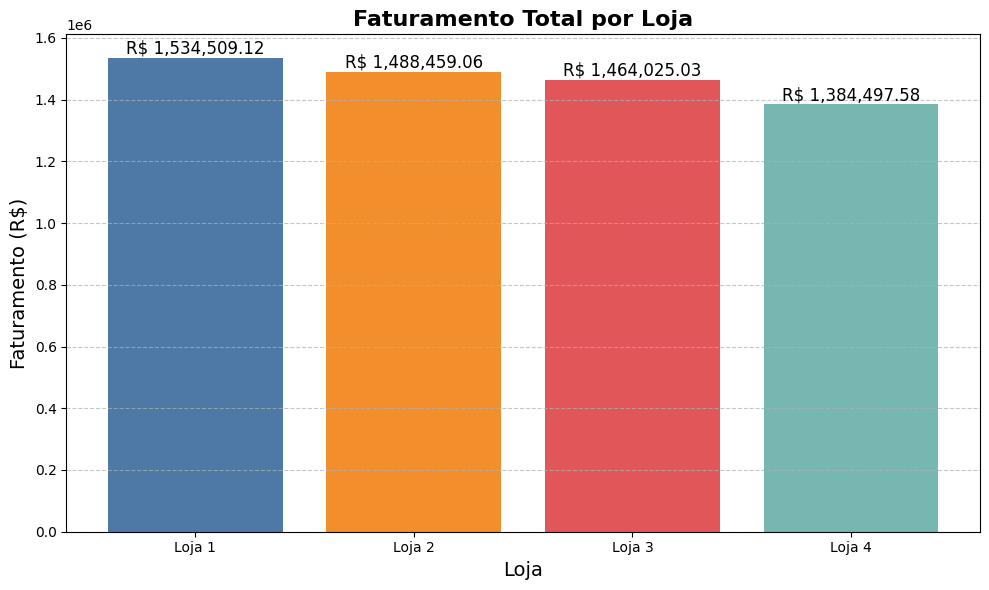

In [ ]:
plt.figure(figsize=(10,6))
bars = plt.bar(faturamento.index, faturamento.values, color=['#4e79a7', '#f28e2b', '#e15759', '#76b7b2'])
plt.title('Faturamento Total por Loja', fontsize=16, fontweight='bold')
plt.xlabel('Loja', fontsize=14)
plt.ylabel('Faturamento (R$)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000, f'R$ {yval:,.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [ ]:
vendas_por_categoria = df_total.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)
print(vendas_por_categoria)

Categoria do Produto
eletronicos              2214099.72
eletrodomesticos         1766337.03
moveis                   1010214.00
instrumentos musicais     465029.67
esporte e lazer           190635.39
brinquedos                 98140.86
utilidades domesticas      76773.38
livros                     50260.74
Name: Preço, dtype: float64


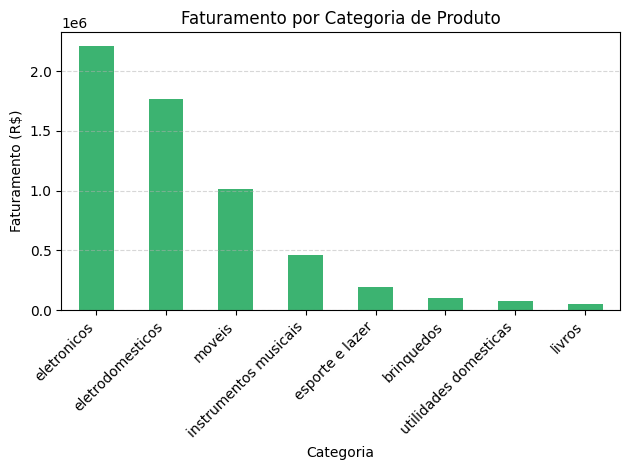

In [ ]:
vendas_por_categoria.plot(kind='bar', color='mediumseagreen')
plt.title('Faturamento por Categoria de Produto')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Categoria')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [ ]:
media_avaliacoes = df_total.groupby('loja')['Avaliação da compra'].mean().round(2).sort_values(ascending=False)
print(media_avaliacoes)

loja
Loja 3    4.05
Loja 2    4.04
Loja 4    4.00
Loja 1    3.98
Name: Avaliação da compra, dtype: float64


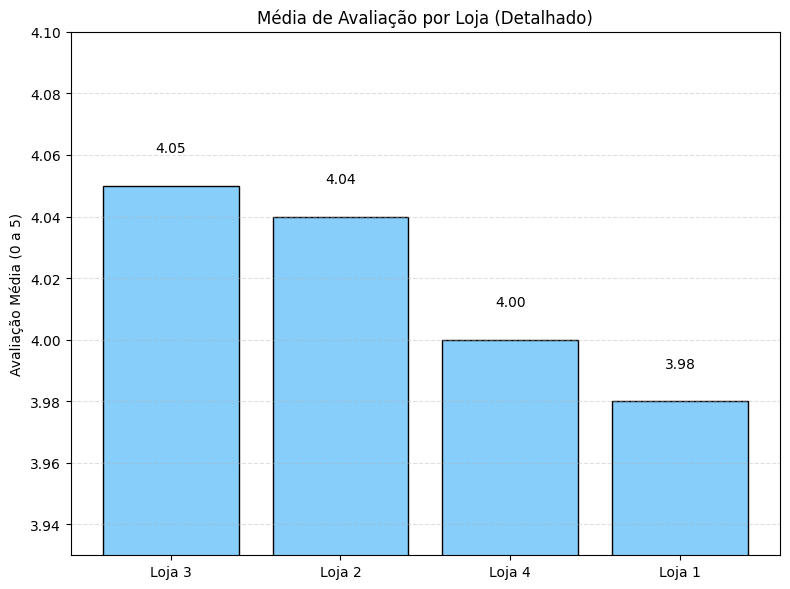

In [ ]:
plt.figure(figsize=(8, 6))
bars = plt.bar(media_avaliacoes.index, media_avaliacoes.values, color='lightskyblue', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}',
             ha='center', va='bottom', fontsize=10)

plt.ylim(media_avaliacoes.min() - 0.05, media_avaliacoes.max() + 0.05)  # Aproxima o zoom
plt.ylabel('Avaliação Média (0 a 5)')
plt.title('Média de Avaliação por Loja (Detalhado)')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [ ]:
vendas_por_produto = df_total['Produto'].value_counts()

In [ ]:
mais_vendidos = vendas_por_produto.head(10)
print(mais_vendidos)

Produto
Cômoda                      210
Carrinho controle remoto    206
Micro-ondas                 206
Bateria                     203
Cama king                   201
Secadora de roupas          200
Modelagem preditiva         200
Jogo de panelas             200
Cama box                    199
Blocos de montar            199
Name: count, dtype: int64


In [ ]:
menos_vendidos = vendas_por_produto.tail(10)
print(menos_vendidos)

Produto
Panela de pressão              172
Smartwatch                     172
Jogo de copos                  169
Poltrona                       168
Assistente virtual             167
Ciência de dados com python    166
Guitarra                       165
Mochila                        163
Headset                        158
Celular ABXY                   157
Name: count, dtype: int64


# 5. Frete Médio por Loja


In [ ]:
frete_medio_por_loja = df_total.groupby('loja')['Frete'].mean().round(2).sort_values()
print(frete_medio_por_loja)

loja
Loja 4    31.28
Loja 3    33.07
Loja 2    33.62
Loja 1    34.69
Name: Frete, dtype: float64


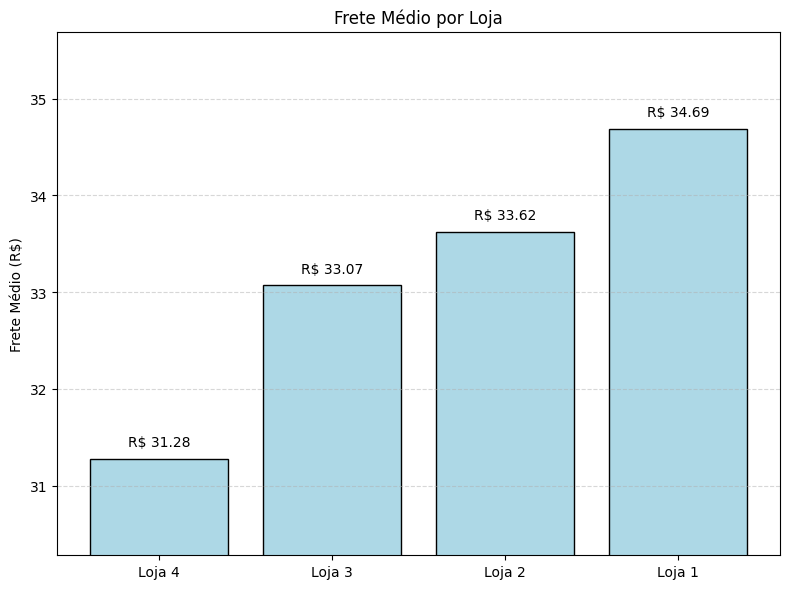

In [ ]:
plt.figure(figsize=(8, 6))
bars = plt.bar(frete_medio_por_loja.index, frete_medio_por_loja.values, color='lightblue', edgecolor='black')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'R$ {yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Frete Médio por Loja')
plt.ylabel('Frete Médio (R$)')
plt.ylim(frete_medio_por_loja.min() - 1, frete_medio_por_loja.max() + 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Relatório de Análise de Desempenho – Recomendação de Venda de Loja



### Análise Técnica

#### 📌 Faturamento
- A **Loja 4** tem o menor faturamento, com uma diferença de aproximadamente **R$ 150 mil a menos que a Loja 1**.

#### 📌 Avaliação dos Clientes
- A **Loja 4** possui avaliação média de **4.00**, **inferior às Lojas 2 (4.04) e 3 (4.05)**.

#### 📌 Frete Médio
- A **Loja 4** apresenta **o menor custo logístico**, mas esse diferencial **não se reflete em desempenho geral**.


### ✅ Conclusão e Recomendação

- A Loja 4 apresenta **menor retorno financeiro**.
- **Não lidera em nenhum critério estratégico** de forma isolada.
- O **frete mais barato não compensa o desempenho mediano em avaliação e fraco em faturamento**.
"""